# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [44]:
from sklearn.model_selection import train_test_split

# Define X and Y
X = data.iloc[:, :-1]  # All rows and all the columns except from the last one
y = data.iloc[:, -1].values

# Your code here:
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(506, 13) (404, 13) (102, 13)
(506,) (404,) (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [45]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Create the Linear Regression estimator
conversion_model = LinearRegression()

# Perform de fitting
conversion_model.fit(X_train,y_train)

# Print intercept
print("Intercept:", conversion_model.intercept_)

# Create a DataFrame to display feature names with their coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': conversion_model.coef_})

# Print the coefficients DataFrame
print(coefficients.sort_values(by="Coefficient", ascending=False))

# Prediction on test set
y_test_pred = conversion_model.predict(X_test)

# Predictions on training set
y_train_pred = conversion_model.predict(X_train)

#Predicted values
print(f"First 5 predictions on the training set: {y_train_pred[:5]}")
print(f"First 5 predictions on the test set: {y_test_pred[:5]}")

# Actual value and the predicted value
test_comparison = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_test_pred})
train_comparison = pd.DataFrame({'Actual value (Train)': y_train,'Predicted value (Train)': y_train_pred})

print("Training set comparison:")
print(train_comparison.head())

print("Testing set comparison:")
print(test_comparison.head())

Intercept: 35.44141791079789
    Feature  Coefficient
5        RM     3.948736
3      CHAS     1.083485
8       RAD     0.293000
2     INDUS     0.058377
1        ZN     0.044250
11        B     0.011035
6       AGE     0.000089
9       TAX    -0.014212
0      CRIM    -0.067413
12    LSTAT    -0.502955
10  PTRATIO    -1.016563
7       DIS    -1.414864
4       NOX   -16.382894
First 5 predictions on the training set: [35.39263232 29.05122774 19.16873201 41.64932961  3.67649902]
First 5 predictions on the test set: [25.7014347  19.77012208 22.50289883 24.93901316 14.77409316]
Training set comparison:
   Actual value (Train)  Predicted value (Train)
0                  33.8                35.392632
1                  28.6                29.051228
2                  18.3                19.168732
3                  48.8                41.649330
4                   8.8                 3.676499
Testing set comparison:
   Actual value  Predicted value
0          23.2        25.701435
1         

## 3. Calculate and print R-squared for both the training and the testing set.

In [46]:
from sklearn import metrics

r_squared_test = metrics.r2_score(y_test, y_test_pred)
r_squared_train = metrics.r2_score(y_train, y_train_pred)

print("R^2 test:", r_squared_test)
print("R^2 train:", r_squared_train)

R^2 test: 0.75757809355804
R^2 train: 0.73089395512001


## 4. Calculate and print mean squared error for both the training and the testing set.

In [47]:
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)

print("MSE:", mse_test)
print("MSE:", mse_train)

MSE: 23.11237990069939
MSE: 21.970029915357653


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [48]:
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)

print("MAE:", mae_test)
print("MAE:", mae_train)

MAE: 3.174454544384287
MAE: 3.3015545367343995


## Classification Model Evaluation

In [49]:
from sklearn.datasets import load_iris
iris = load_iris()

In [50]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [51]:
column_names = iris.feature_names

In [52]:
df = pd.DataFrame(iris['data'],columns=column_names)

In [53]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
target = pd.DataFrame(iris.target)

In [55]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [56]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [57]:
# Define X and Y
X = iris.data
y = iris.target

# Your code here:
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(150, 4) (120, 4) (30, 4)
(150,) (120,) (30,)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [58]:
# Import Linear Regression
from sklearn.linear_model import LogisticRegression

# Create the Linear Regression estimator
iris_model = LogisticRegression()

# Perform de fitting
iris_model.fit(X_train,y_train)

# Print intercept
print("Intercept:", iris_model.intercept_)

# Create a DataFrame to display feature names with their coefficients
coefficients = pd.DataFrame(
    iris_model.coef_.T,  # Transpose to make features rows and classes columns
    index=iris.feature_names,
    columns=[f"Class {i}" for i in range(iris_model.coef_.shape[0])]
)
print(coefficients)

# Prediction on test set
y_test_pred = iris_model.predict(X_test)

# Predictions on training set
y_train_pred = iris_model.predict(X_train)

#Predicted values
print(f"First 5 predictions on the training set: {y_train_pred[:5]}")
print(f"First 5 predictions on the test set: {y_test_pred[:5]}")

# Actual value and the predicted value
test_comparison = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_test_pred})
train_comparison = pd.DataFrame({'Actual value (Train)': y_train,'Predicted value (Train)': y_train_pred})

print("Training set comparison:")
print(train_comparison.head())

print("Testing set comparison:")
print(test_comparison.head())

Intercept: [  9.17234781   1.8694992  -11.04184701]
                    Class 0   Class 1   Class 2
sepal length (cm) -0.363122  0.573569 -0.210448
sepal width (cm)   0.928601 -0.309728 -0.618873
petal length (cm) -2.408223 -0.265516  2.673740
petal width (cm)  -1.051437 -0.786727  1.838164
First 5 predictions on the training set: [1 2 1 0 1]
First 5 predictions on the test set: [0 0 2 2 2]
Training set comparison:
   Actual value (Train)  Predicted value (Train)
0                     1                        1
1                     2                        2
2                     1                        1
3                     0                        0
4                     1                        1
Testing set comparison:
   Actual value  Predicted value
0             0                0
1             0                0
2             2                2
3             2                2
4             2                2


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

print("Accuracy: {:.2f}%".format(accuracy_test * 100))
print("Accuracy: {:.2f}%".format(accuracy_train * 100))

Accuracy: 96.67%
Accuracy: 98.33%


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [76]:
from sklearn.metrics import balanced_accuracy_score

# Assume y_test are the true labels and y_pred are the predicted labels
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)
balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred)

print("Balanced Accuracy test: {:.2f}%".format(balanced_accuracy_test * 100))
print("Balanced Accuracy train: {:.2f}%".format(balanced_accuracy_train * 100))

Balanced Accuracy test: 96.30%
Balanced Accuracy train: 98.37%


## 10. Calculate and print the precision score for both the training and the testing set.

In [77]:
from sklearn.metrics import precision_score

# Assume y_test are the true labels and y_pred are the predicted labels
precision_test = precision_score(y_test, y_test_pred, average="micro")
precision_train = precision_score(y_train, y_train_pred, average="micro")

print("Precision test: {:.2f}%".format(precision_test * 100))
print("Precision train: {:.2f}%".format(precision_train * 100))

Precision test: 96.67%
Precision train: 98.33%


## 11. Calculate and print the recall score for both the training and the testing set.

In [78]:
from sklearn.metrics import recall_score

# Assume y_test are the true labels and y_pred are the predicted labels
recall_test = recall_score(y_test, y_test_pred, average="micro")
recall_train = recall_score(y_train, y_train_pred, average="micro")

print("Recall test: {:.2f}%".format(recall_test * 100))
print("Recall train: {:.2f}%".format(recall_train * 100))

Recall test: 96.67%
Recall train: 98.33%


## 12. Calculate and print the F1 score for both the training and the testing set.

In [79]:
from sklearn.metrics import f1_score

# Assume y_test are the true labels and y_pred are the predicted labels
f1_test = f1_score(y_test, y_test_pred, average="micro")
f1_train = f1_score(y_train, y_train_pred, average="micro")

print("F1 test: {:.2f}%".format(f1_test * 100))
print("F1 train: {:.2f}%".format(f1_train * 100))

F1 test: 96.67%
F1 train: 98.33%


## 13. Generate confusion matrices for both the training and the testing set.

Confusion matrix test:


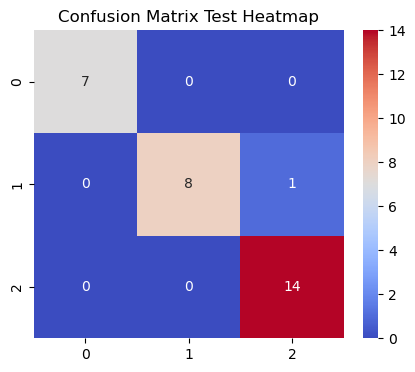

Confusion matrix train:


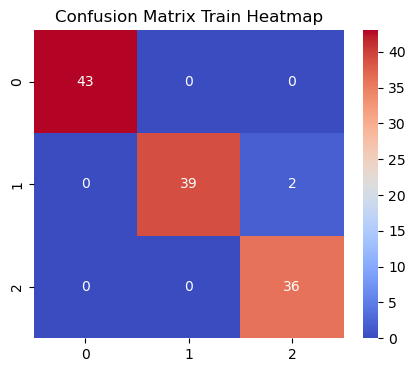

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume y_test are the true labels and y_pred are the predicted labels
cnf_test = confusion_matrix(y_test, y_test_pred)
cnf_train = confusion_matrix(y_train, y_train_pred)

print("Confusion matrix test:")
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_test, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Confusion Matrix Test Heatmap")
plt.show()

print("Confusion matrix train:")
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_train, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Confusion Matrix Train Heatmap")
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [66]:
# Have fun here !